# Descriptive Statistics with Python

### By Josh Houlding

# Task 1: Outlier Identification and Handling
In this task, you will work with a real-world dataset to identify and handle outliers. Choose a dataset (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, that exhibits outliers or extreme values. Write a Python script that identifies and handles the outliers using at least two methods (e.g., z-score, interquartile range). Use visualization techniques to demonstrate the impact of the outliers on measures of central tendency and variability.

<b>Dataset used:</b> https://www.kaggle.com/datasets/anshikakashyap12/fruits-and-vegetables-prices-in-usa

"Fruits-Vegetables Prices In USA In The Year 2020"

In [180]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

In [181]:
# Import dataset and view structure
fruit_prices = pd.read_csv("Fruit Prices 2020.csv")
fruit_prices.head(3)

Fruit    Form  RetailPrice RetailPriceUnit  Yield  \
0                  Apples   Fresh       1.5193       per pound    0.9   
1      Apples, applesauce  Canned       1.0660       per pound    1.0   
2  Apples, ready-to-drink   Juice       0.7804        per pint    1.0   

   CupEquivalentSize CupEquivalentUnit  CupEquivalentPrice  
0             0.2425            pounds              0.4094  
1             0.5401            pounds              0.5758  
2             8.0000      fluid ounces              0.3902

### Finding outliers using the interquartile range

<Axes: xlabel='RetailPrice'>

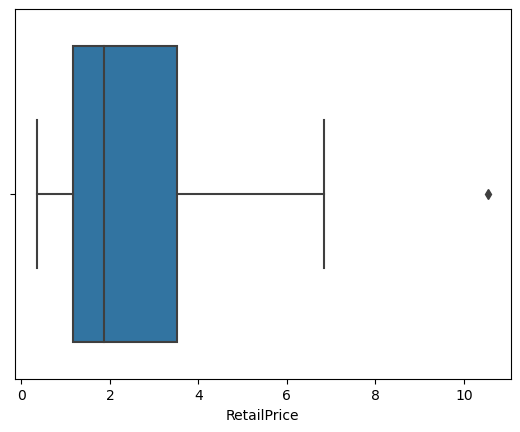

In [182]:
# Generate a boxplot to find outliers
sns.boxplot(x="RetailPrice", data=fruit_prices)

Looking at the boxplot of retail prices for fruits, there is 1 outlier on the high end. Let's find this outlier and determine what to do with it. 

In [183]:
# Find the IQR
Q1 = fruit_prices["RetailPrice"].quantile(0.25)
Q3 = fruit_prices["RetailPrice"].quantile(0.75) 
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
fruit_outliers = fruit_prices[(fruit_prices["RetailPrice"] < lower_bound) | (fruit_prices["RetailPrice"] > upper_bound)]
fruit_outliers

Fruit   Form  RetailPrice RetailPriceUnit  Yield  CupEquivalentSize  \
32  Mangoes  Dried      10.5527       per pound    1.0             0.1253   

   CupEquivalentUnit  CupEquivalentPrice  
32            pounds              1.3219

We have found that dried mangoes are the outlier in our dataset. 

### Finding outliers using the Z-score

In [184]:
# Find the Z-score for "RetailPrice" column
fruit_prices["Z-Score"] = zscore(fruit_prices["RetailPrice"])

# Using a Z-score threshold of 3 to find extreme outliers
threshold = 3

# Any value with a Z-score above threshold or below -threshold is an outlier
fruit_outliers = fruit_prices[(fruit_prices["Z-Score"] > threshold) | (fruit_prices["Z-Score"] < -threshold)]
fruit_outliers

Fruit   Form  RetailPrice RetailPriceUnit  Yield  CupEquivalentSize  \
32  Mangoes  Dried      10.5527       per pound    1.0             0.1253   

   CupEquivalentUnit  CupEquivalentPrice   Z-Score  
32            pounds              1.3219  3.868927

Unsurprisingly, dried mangoes show up again in our set of outliers, with a very high Z-Score of ~3.87. 

### Showing how dried mangoes affect measures of central tendency and variability

In [185]:
# Describe the dataset with dried mangoes included
fruit_prices["RetailPrice"].describe()

count    62.000000
mean      2.616050
std       2.068129
min       0.360400
25%       1.155850
50%       1.868400
75%       3.525600
max      10.552700
Name: RetailPrice, dtype: float64

In [186]:
# Describe the dataset without dried mangoes
fruit_prices_without_dried_mango = fruit_prices[(fruit_prices["Fruit"] != "Mangoes") & (fruit_prices["Form"] != "Dried")]
fruit_prices_without_dried_mango["RetailPrice"].describe()

count    52.000000
mean      2.022504
std       1.366329
min       0.360400
25%       1.038325
50%       1.703600
75%       2.639725
max       6.639100
Name: RetailPrice, dtype: float64

Without dried mangoes included, the mean drops by ~22.6%, the standard deviation drops by ~33.8%, and the first, second and third quantiles all change. Additionally, the max drops since dried mangoes were so much more expensive per pound than other types of fruit. 

<Axes: xlabel='RetailPrice'>

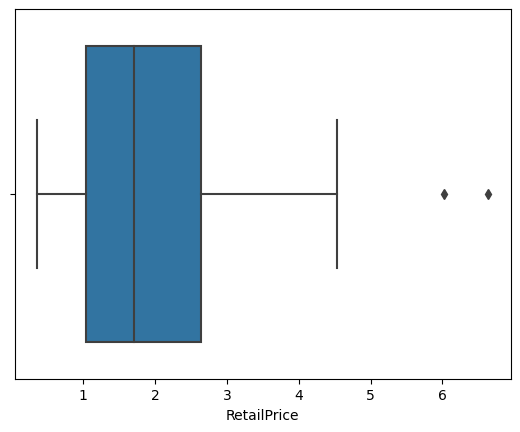

In [187]:
# Show new boxplot without dried mangoes
sns.boxplot(x="RetailPrice", data=fruit_prices_without_dried_mango)

Removing dried mangoes changed the entire boxplot, which led to a new IQR being calculated, and thus new outliers are present relative to this new boxplot. 

# Task 2: Bias and Confounding Variables Identification
Identify potential sources of bias or confounding variables in the dataset selected in Task 1 above and discuss how they might impact the analysis.

In [188]:
fruit_prices.head()

Fruit    Form  RetailPrice RetailPriceUnit  Yield  \
0                      Apples   Fresh       1.5193       per pound   0.90   
1          Apples, applesauce  Canned       1.0660       per pound   1.00   
2      Apples, ready-to-drink   Juice       0.7804        per pint   1.00   
3  Apples, frozen concentrate   Juice       0.5853        per pint   1.00   
4                    Apricots   Fresh       2.9665       per pound   0.93   

   CupEquivalentSize CupEquivalentUnit  CupEquivalentPrice   Z-Score  
0             0.2425            pounds              0.4094 -0.534639  
1             0.5401            pounds              0.5758 -0.755612  
2             8.0000      fluid ounces              0.3902 -0.894835  
3             8.0000      fluid ounces              0.2926 -0.989942  
4             0.3638            pounds              1.1603  0.170836

In [189]:
fruit_prices["Form"].value_counts()

Form
Fresh     24
Canned    12
Juice     11
Dried      9
Frozen     6
Name: count, dtype: int64

<b>Potential sources of bias</b>
* Pre-cut fruit is usually several dollars more expensive per pound than fresh fruits, which could give the impression that the cup equivalent price of pre-cut fruit is higher than that of fresh fruits, even if this is not accurate. 
* The price of fruit could be affected by the cup equivalent size. Typically, fruits with a large cup equivalent size will be more expensive than those will smaller cup equivalent sizes, leading to bias toward the conclusion that fruits with a larger cup equivalent size are more expensive. 
* Different types of fruit vary in price, making it difficult to determine the true relationship between retail price and the cup equivalent price. 

<b>Source:</b> https://www.myrecipes.com/extracrispy/should-you-buy-fruit-pre-cut-or-whole

# Task 3: Handling Missing Data
Develop and justify an appropriate statistical method to handle missing data in the dataset selected in Task 1.

In [190]:
# Find any rows with missing data
fruit_prices[fruit_prices.isna().any(axis=1)]

Empty DataFrame
Columns: [Fruit, Form, RetailPrice, RetailPriceUnit, Yield, CupEquivalentSize, CupEquivalentUnit, CupEquivalentPrice, Z-Score]
Index: []

We can see that there is no missing data in this dataset. However, there are several ways that rows with missing data can be handled, and the following are some missing data scenarios and the actions I would choose to take in each of them. 

* <b>All values in the row are missing:</b> Drop the entire row. 
* <b>Most values in the row are missing:</b> Drop the entire row. 
* <b>Only one or two values in the row are missing:</b> Fill these values with the mean, median, or mode of the column(s), depending on what is most appropriate.

# Task 4: Analysis of Mean and Median Values
In this task, you will analyze a dataset to understand the difference between mean and median values. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, where the mean and median values differ significantly. Write a Python script to calculate and visualize the mean and median values of the dataset. Interpret the results and provide insights into what the difference means for the dataset. Propose solutions to handle this discrepancy and implement them using Python.
Compare and contrast the effectiveness of four different measures of central tendency and variability in capturing the characteristics of the data.

<b>Dataset used:</b> https://www.kaggle.com/datasets/camnugent/california-housing-prices

"Median house prices for California districts derived from the 1990 census."

In [191]:
# Load the dataset
housing_prices = pd.read_csv("California Housing Prices.csv")
housing_prices.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [192]:
# Find mean and median house values
mean_house_value = housing_prices["median_house_value"].mean()
median_house_value = housing_prices["median_house_value"].median()
print("Mean house value: $", round(mean_house_value, 2), ", median house value: $", round(median_house_value, 2))

Mean house value: $ 206855.82 , median house value: $ 179700.0


<Axes: xlabel='median_house_value', ylabel='Count'>

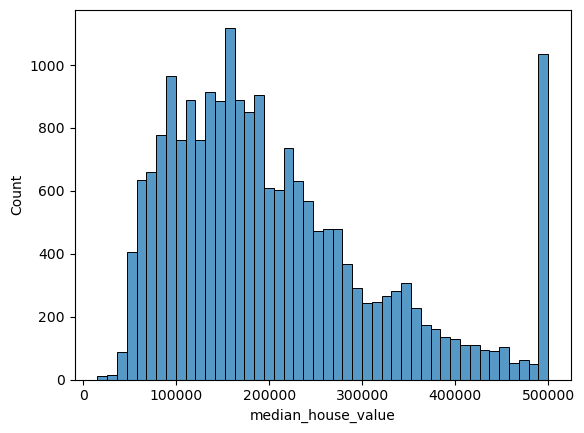

In [193]:
# Generate histogram of house values
sns.histplot(housing_prices["median_house_value"])

The data exhibits a noticeable right skew, which is consistent with the fact that the median is lower than the mean. Most houses appear to be between <span>&#36;70,000</span> and <span>&#36;270,000</span> in price, with less and less being more expensive than that until about the <span>&#36;500,000</span> mark, where there are many houses listed. This seems to mean that most California houses in 1990 were catered toward the average middle-class family, with a significant minority targeted at the upper-middle and upper classes. 

In [194]:
# View basic stats for housing prices
housing_prices["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

Finding and removing outliers is one common method for handling the discrepancy between mean and median in a dataset. This can be done easily using the interquartile range (IQR) method. 

In [195]:
# Find the IQR
Q1 = housing_prices["median_house_value"].quantile(0.25)
Q3 = housing_prices["median_house_value"].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the number of outliers
housing_outliers = housing_prices[(housing_prices["median_house_value"] < lower_bound) | (housing_prices["median_house_value"] > upper_bound)]
housing_outliers.shape

(1071, 10)

There are 1,071 houses that are outliers in terms of price in this dataset, out of a total of 20,640 houses. Removing these would remove over 5% of our data, which would have a considerable impact on our measures of central tendency and variability. 

In [196]:
# View dataset without outliers present
outliers_mask = (housing_prices["median_house_value"] < lower_bound) | (housing_prices["median_house_value"] > upper_bound)
housing_prices_no_outliers = housing_prices[~outliers_mask]
housing_prices_no_outliers.shape

(19569, 10)

In [197]:
# View stats about original dataset again
housing_prices["median_house_value"].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [198]:
print("Original median:", housing_prices["median_house_value"].median())

Original median: 179700.0


In [199]:
# View stats about dataset without outliers
housing_prices_no_outliers["median_house_value"].describe()

count     19569.000000
mean     190852.301906
std       95438.555669
min       14999.000000
25%      116200.000000
50%      173200.000000
75%      246700.000000
max      482200.000000
Name: median_house_value, dtype: float64

In [200]:
print("New median:", housing_prices_no_outliers["median_house_value"].median())

New median: 173200.0


After removing outliers, the mean decreased considerably, and the median shifted slightly. Thus, removing outliers led to the data being more representative of a typical California house overall.  

### Compare and contrast the effectiveness of four different measures of central tendency and variability in capturing the characteristics of the data.

1. <b>Mean:</b> The mean is useful for determining where most data points are concentrated, since it is the arithmetic "center" of the data. It represents the price of the "average" house in California in 1990. 
2. <b>Median:</b> The median is useful for locating the "center" of a dataset when there are extreme outliers that lead to a mean unrepresentative of the overall dataset. It is the "middle" value, and is not affected by the values themselves, only by the number and position of those values. 
3. <b>Range:</b> The range of a dataset is the difference between the maximum and minimum value. It shows the window of values we are working with in a dataset, which can be helpful in deciding what to do during analysis. 
4. <b>Standard Deviation:</b> The standard deviation of a dataset measures how spread-out the values are from the mean. It is helpful for seeing whether values are clustered tightly, or spread out significantly. This helps in understanding the distribution for further analysis. 

# Task 5: Data Visualization
In this task, you will use Python to create visualizations that effectively communicate data distribution. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and create basic plots to visualize the data distribution (e.g., histogram, boxplot). Analyze the plots to gain insights into the data distribution and interpret the results.

<b>Dataset used:</b> https://www.kaggle.com/datasets/raidevesh05/movie-ratings-dataset

"This Dataset has records of imdb ratings of movies released from 2000-2017"

In [201]:
# Read movies dataset
movies_data = pd.read_csv("movie_ratings.csv")
movies_data.head()

Unnamed: 0                movie  year  imdb  metascore    votes
0           0            Gladiator  2000   8.5       67.0  1187559
1           1              Memento  2000   8.5       80.0  1014199
2           2               Snatch  2000   8.3        NaN   707162
3           3  Requiem for a Dream  2000   8.3       68.0   688394
4           4                X-Men  2000   7.4       64.0   526411

In [202]:
# View basic stats about IMDB ratings
movies_data["imdb"].describe()

count    1800.000000
mean        7.239444
std         0.818280
min         4.100000
25%         6.700000
50%         7.300000
75%         7.800000
max         9.900000
Name: imdb, dtype: float64

In [203]:
# View distribution of IMDB ratings
sns.histplot(movies_data["imdb"])

<Axes: xlabel='imdb', ylabel='Count'>

The distribution of IMDB ratings approximately follows a normal distribution, with a very slight left skew toward the high end of ratings. 

<Axes: xlabel='imdb'>

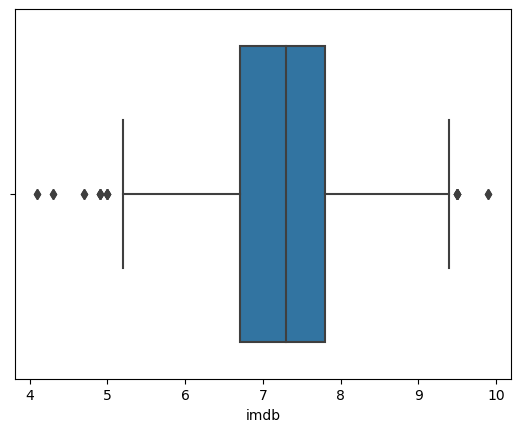

In [204]:
# Create boxplot of IMDB ratings
sns.boxplot(x=movies_data["imdb"])

It appears there are 7 distinct IMDB scores that are outliers. Let's locate these and see which movies they are: 

In [205]:
# Find outliers using Z-score
movies_data["IMDB_Zscore"] = zscore(movies_data["imdb"])
threshold = 3

imdb_outliers = movies_data[(movies_data["IMDB_Zscore"] > threshold) | (movies_data["IMDB_Zscore"] < -threshold)]
imdb_outliers

Unnamed: 0                        movie  year  imdb  metascore   votes  \
925          925  The Twilight Saga: New Moon  2009   4.7        NaN  245496   
975          975  The Twilight Saga: New Moon  2009   4.7        NaN  245496   
1518        1518         Fifty Shades of Grey  2015   4.1        NaN  274536   
1546        1546               Fantastic Four  2015   4.3        NaN  137778   
1568        1568         Fifty Shades of Grey  2015   4.1        NaN  274536   
1596        1596               Fantastic Four  2015   4.3        NaN  137778   
1640        1640              Game of Thrones  2011   9.9        NaN  158728   
1690        1690              Game of Thrones  2011   9.9        NaN  158728   

      IMDB_Zscore  
925     -3.104254  
975     -3.104254  
1518    -3.837703  
1546    -3.593220  
1568    -3.837703  
1596    -3.593220  
1640     3.252302  
1690     3.252302

We find that The Twilight Saga: New Moon, Fifty Shades of Grey, and Fantastic Four had unusually low ratings, while Game of Thrones (unsurprisingly) dominated the IMDB ratings (this dataset is from 5 years ago, I doubt it's a 9.9 anymore after season 8 ðŸ˜‚). 

# Task 6: Measures of Central Tendency and Variability
In this task, you will calculate and interpret measures of central tendency and variability using Python. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources,  and write a Python script to calculate the mean, median, mode, range, variance, and standard deviation of the dataset. Interpret the results and discuss how the measures of central tendency and variability relate to the data distribution.

<b>Dataset used:</b> https://www.kaggle.com/datasets/joebeachcapital/banana-index

"The Economistâ€™s Banana index: Different way to measure climate impact of food"

In [206]:
# Load the dataset
banana_index = pd.read_csv("bananaindex.csv")
banana_index.head()

entity  year  emissions_kg  emissions_1000kcal  \
0            Ale  2022      0.488690            0.317338   
1  Almond butter  2022      0.387011            0.067265   
2    Almond milk  2022      0.655888            2.222230   
3        Almonds  2022      0.602368            0.105029   
4    Apple juice  2022      0.458378            0.955184   

   emissions_100g_protein  emissions_100g_fat  land_use_kg  land_use_1000kcal  \
0                0.878525            2.424209     0.811485           0.601152   
1                0.207599            0.079103     7.683045           1.296870   
2               13.595512            4.057470     1.370106           2.675063   
3                0.328335            0.119361     8.230927           1.423376   
4               29.152212           19.754980     0.660629           1.382839   

   Land use per 100 grams of protein  Land use per 100 grams of fat  \
0                           1.577687                       3.065766   
1                           3.608433                       1.495297   
2                          12.687839                       4.600530   
3                           4.261040                       1.610136   
4                          43.232158                      26.246743   

   Bananas index (kg)  Bananas index (1000 kcalories)  \
0            0.559558                        0.362340   
1            0.443134                        0.076804   
2            0.751002                        2.537364   
3            0.689721                        0.119923   
4            0.524851                        1.090638   

   Bananas index (100g protein)  Chart?  type       Banana values  Unnamed: 16  
0                      0.113771    True     1              Per KG     0.873350  
1                      0.026885    True     1  Per 1000 kcalories     0.875803  
2                      1.760651    True     1    Per 100g protein     7.721869  
3                      0.042520    True     1                 NaN          NaN  
4                      3.775280    True     1                 NaN          NaN

We will be focusing on the column `emissions_kg` in this dataset, which represents how many kilograms of CO2-equivalent emissions are generated to produce one unit of that item. We calculate its mean, median, mode, range, variance, and standard deviation: 

In [207]:
# Calculate measures of central tendency and variability 
mean = banana_index["emissions_kg"].mean()
median = banana_index["emissions_kg"].median()
mode = banana_index["emissions_kg"].mode().iloc[0]
range = banana_index["emissions_kg"].max() - banana_index["emissions_kg"].min()
variance = banana_index["emissions_kg"].var()
stdev = banana_index["emissions_kg"].std()

print("Mean:", mean, "| median:", median, "| mode:", mode)
print("Range:", range, "| variance:", variance, "| stdev:", stdev)

Mean: 6.936927809687499 | median: 2.0449556749999998 | mode: 0.20727616
Range: 129.54043884 | variance: 230.50185198889235 | stdev: 15.182287442572425


<Axes: xlabel='emissions_kg', ylabel='Count'>

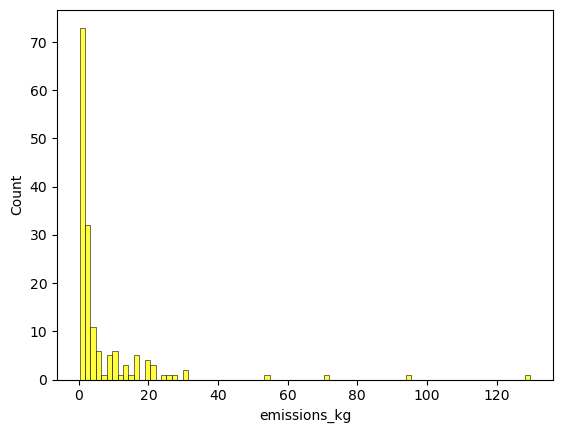

In [208]:
# Plot the distribution of emissions_kg
sns.histplot(banana_index["emissions_kg"], color="yellow")

In [209]:
# Find food items that produce less than 5 kg of CO2-equivalent per unit
#banana_index[banana_index["emissions_kg"] < 5]

# Find most and least-emitting food item
banana_index.sort_values(by="emissions_kg", ascending=False).head(1)

entity  year  emissions_kg  emissions_1000kcal  \
18  Beef steak  2022    129.747715           68.095953   

    emissions_100g_protein  emissions_100g_fat  land_use_kg  \
18               64.190391           146.10787   427.331126   

    land_use_1000kcal  Land use per 100 grams of protein  \
18         223.690135                         211.381205   

    Land use per 100 grams of fat  Bananas index (kg)  \
18                     478.803717          148.563324   

    Bananas index (1000 kcalories)  Bananas index (100g protein)  Chart?  \
18                       77.752629                      8.312805    True   

    type Banana values  Unnamed: 16  
18     2           NaN          NaN

### Interpretations of measures of central tendency and variability

* <b>Mean:</b> The mean is relatively low at ~6.94, since most food items are clustered in the 0-30 kg of CO2-equivalent per unit range. However, it is dragged up by the small number of very large outliers, as well as the right tail on the main part of the distribution. 
* <b>Median:</b> The median is even lower at ~2.04, given that values are highly clustered on the left side of the plot. This distribution is an excellent example of where the median can be immensely useful over the mean for representing a typical value. 
* <b>Mode:</b> The mode is ~0.2, which is easy to see when looking at the very tall bar close to 0 on the plot. This means that the most common emission rate is very low at approximately 0.2 kg of CO2-equivalent per unit produced. This represents plant-based items, like ale, almond milk, and watermelon. 
* <b>Range:</b> The range is ~129.5, meaning that there is approximately a 129.5 kg of CO2-equivalent difference between the most-emitting and least-emitting food item.
* <b>Variance:</b> The variance is ~230.5, indicating a high amount of spread in the distribution. 
* <b>Standard Deviation:</b> The standard deviation is ~15.2, which is approximately the square root of the variance. This indicates the same thing as the variance, that the data is highly spread out. 

# Task 7: Data Cleaning
In this task, you will use Python to clean a dataset and prepare it for analysis. Choose a messy dataset (e.g., missing values, inconsistent formatting) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and write a Python script to clean the dataset. Use appropriate methods to handle missing values, remove duplicates, and convert data types. Visualize the cleaned dataset to demonstrate the impact of the cleaning process.

<b>Dataset used:</b> https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset

"Understanding the Structure and Content of an Unprocessed Laptop Price Dataset"

In [210]:
# Load the dataset
laptop_data = pd.read_csv("laptopData.csv")
laptop_data.head()

Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [211]:
# Remove missing and duplicate rows
laptop_data = laptop_data.dropna()
laptop_data = laptop_data.drop_duplicates()

In [212]:
# Fill missing values
laptop_data[laptop_data.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price]
Index: []

There are no rows with missing values remaining in the dataset. 

In [213]:
# Drop redundant first column
laptop_data = laptop_data.drop(laptop_data.columns[0], axis=1)
laptop_data.head(1)

Company   TypeName Inches                    ScreenResolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                    Cpu  Ram     Memory                           Gpu  OpSys  \
0  Intel Core i5 2.3GHz  8GB  128GB SSD  Intel Iris Plus Graphics 640  macOS   

   Weight       Price  
0  1.37kg  71378.6832

In [214]:
# Rename columns
new_column_names = {"TypeName": "Type", "Cpu": "CPU", "Ram": "RAM", "Memory": "Storage", "Gpu": "GPU", "OpSys": "OS"}
laptop_data.rename(columns=new_column_names, inplace=True)
laptop_data.head(1)

Company       Type Inches                    ScreenResolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                    CPU  RAM    Storage                           GPU     OS  \
0  Intel Core i5 2.3GHz  8GB  128GB SSD  Intel Iris Plus Graphics 640  macOS   

   Weight       Price  
0  1.37kg  71378.6832

In [215]:
# Fix data types

# Change "Inches" to float and fill missing values with the mean
laptop_data["Inches"] = pd.to_numeric(laptop_data["Inches"].replace("?", pd.NaT), errors="coerce")
laptop_data["Inches"] = laptop_data["Inches"].fillna(laptop_data["Inches"].mean())

In [216]:
# Convert "Price" from Indian rupees to USD
# Current exchange rate: 83.34 rupees per 1 US dollar
laptop_data["Price"] = laptop_data["Price"] / 83.34

# Rename column to reflect the change
laptop_data = laptop_data.rename(columns={"Price": "Price (USD)"})
laptop_data.head(1)

Company       Type  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                    CPU  RAM    Storage                           GPU     OS  \
0  Intel Core i5 2.3GHz  8GB  128GB SSD  Intel Iris Plus Graphics 640  macOS   

   Weight  Price (USD)  
0  1.37kg    856.47568

In [217]:
# Deal with outliers in the "Inches" column

# Show distribution of screen sizes
laptop_data["Inches"].value_counts().to_frame().sort_values(by="Inches", ascending=False).transpose()

Inches  35.600000  33.500000  31.600000  27.300000  25.600000  24.000000  \
count           3          1          1          1          1          2   

Inches  18.400000  17.300000  17.000000  15.600000  15.400000  15.130818  \
count           1        162          1        640          4          1   

Inches  15.000000  14.100000  14.000000  13.900000  13.500000  13.300000  \
count           4          1        192          6          5        161   

Inches  13.000000  12.500000  12.300000  12.000000  11.600000  11.300000  \
count           2         38          5          6         31          1   

Inches  10.100000  
count           3

In [218]:
# Remove laptops with over 18.4 inch screens, since the largest commercially available screen is 
# on the Acer Predator 21 X at 21 inches according to background research I conducted
laptop_data = laptop_data[laptop_data["Inches"] < 18.4]

In [219]:
# Visualize the final result
laptop_data.head()

Company       Type  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          CPU   RAM              Storage  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            GPU     OS  Weight  Price (USD)  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   856.475680  
1        Intel HD Graphics 6000  macOS  1.34kg   574.700302  
2         Intel HD Graphics 620  No OS  1.86kg   367.602592  
3            AMD Radeon Pro 455  macOS  1.83kg  1622.214255  
4  Intel Iris Plus Graphics 650  macOS  1.37kg  1153.057451

# Task 8: Group Analysis
In this task, you will use Python to conduct group analysis on a dataset. Choose a dataset from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, and write a Python script to group the data by a categorical variable (e.g., gender, age group). Calculate measures of central tendency and variability for each group and visualize the results using appropriate plots. Interpret the results and discuss any differences between the groups.

<b>Dataset used:</b> https://www.kaggle.com/datasets/neuromusic/avocado-prices

"Historical data on avocado prices and sales volume in multiple US markets"

In [220]:
# Load the dataset
avocado_data = pd.read_csv("avocado.csv")
avocado_data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [221]:
avocado_data["type"].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [222]:
# Group avocados sales into conventional and organic
conventional_avocados = avocado_data[avocado_data["type"] == "conventional"]
organic_avocados = avocado_data[avocado_data["type"] == "organic"]

Let's look at the `AveragePrice` and `Total Volume` columns and see what we can find. 

### Analyzing conventional avocados

In [223]:
# Compute measures of central tendency and variability for price of conventional avocados 
conventional_avocados["AveragePrice"].describe()

count    9126.000000
mean        1.158040
std         0.263041
min         0.460000
25%         0.980000
50%         1.130000
75%         1.320000
max         2.220000
Name: AveragePrice, dtype: float64

In [224]:
# Compute median
conventional_avocados["AveragePrice"].median()

1.13

<Axes: xlabel='AveragePrice', ylabel='Count'>

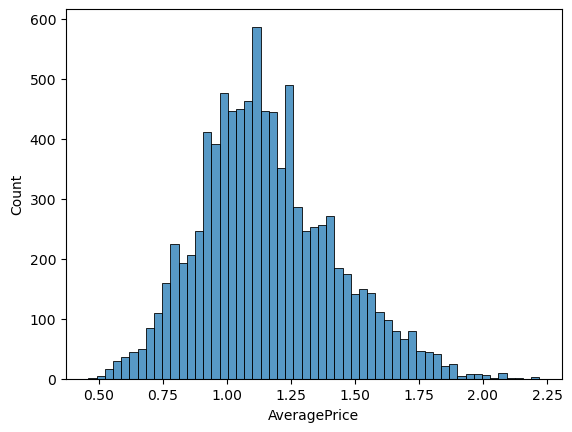

In [225]:
# Create histogram for price 
sns.histplot(conventional_avocados["AveragePrice"])

The mean and median are almost the same, suggesting a roughly normal distribution, and the histogram plot confirms this. 

In [226]:
# Compute measures of central tendency and variability for total volume of conventional avocados 
conventional_avocados["Total Volume"].describe()

count    9.126000e+03
mean     1.653213e+06
std      4.747892e+06
min      3.369968e+04
25%      1.989086e+05
50%      4.083255e+05
75%      1.030992e+06
max      6.250565e+07
Name: Total Volume, dtype: float64

### Analyzing organic avocados

In [227]:
# Compute measures of central tendency and variability for price of organic avocados 
organic_avocados["AveragePrice"].describe()

count    9123.000000
mean        1.653999
std         0.363502
min         0.440000
25%         1.420000
50%         1.630000
75%         1.870000
max         3.250000
Name: AveragePrice, dtype: float64

As expected, the organic avocados are significantly more expensive on average than the conventional ones (<span>&dollar;0.50</span> more on average). 

In [228]:
# Compute median
organic_avocados["AveragePrice"].median()

1.63

<Axes: xlabel='AveragePrice', ylabel='Count'>

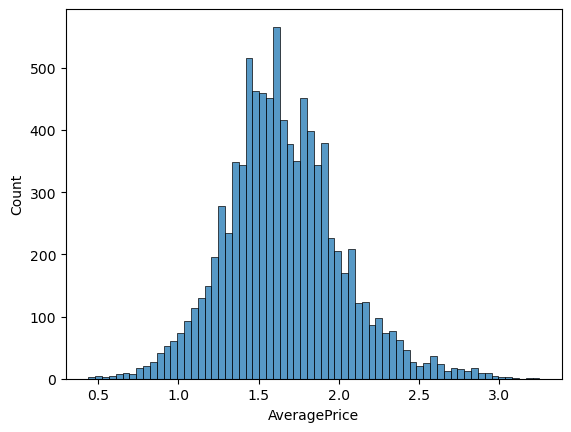

In [229]:
# Create histogram for price 
sns.histplot(organic_avocados["AveragePrice"])

The only major difference between the average price distributions of conventional and organic avocados is in the location of the bell curve on the x-axis (the mean). There is also slightly higher variance in prices for organic avocados. 

In [230]:
# Compute measures of central tendency and variability for total volume of organic avocados 
organic_avocados["Total Volume"].describe()

count    9.123000e+03
mean     4.781121e+04
std      1.424069e+05
min      8.456000e+01
25%      4.779910e+03
50%      1.083576e+04
75%      3.008704e+04
max      1.814930e+06
Name: Total Volume, dtype: float64